In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 1: Wczytywanie danych i wyświetlanie podstawowych informacji
def zadanie_1():
    print("\n--- Zadanie 1: Wczytywanie danych i wyświetlanie podstawowych informacji ---")
    
    # Wczytaj dane z pliku CSV
    df = pd.read_csv('IHME_HEALTH_SPENDING_1995_2018_Y2021M09D22.csv')
    
    # Wyświetl pierwsze 5 wierszy
    print("\nPierwsze 5 wierszy danych:")
    print(df.head())
    
    # Sprawdź podstawowe informacje o danych
    print("\nInformacje o danych:")
    print(df.info())
    
    # Wyświetl podstawowe statystyki opisowe
    print("\nPodstawowe statystyki opisowe:")
    print(df.describe())
    
    return df

In [10]:
# Zadanie 2: Obliczanie podstawowych statystyk
def zadanie_2(df):
    print("\n--- Zadanie 2: Obliczanie podstawowych statystyk ---")
    
    # Oblicz średnią dla kolumny 'the_total_mean'
    mean_the_total_mean = df['the_total_mean'].mean()
    print(f"\nŚredni wiek: {mean_the_total_mean:.2f}")
    
    # Oblicz medianę dla kolumny 'the_total_lower'
    median_the_total_lower = df['the_total_lower'].median()
    print(f"Mediana dochodu: {median_the_total_lower:.2f}")
    
    # Oblicz odchylenie standardowe dla kolumny 'ghes_total_lower'
    std_ghes_total_lower = df['ghes_total_lower'].std()
    print(f"Odchylenie standardowe wieku: {std_ghes_total_lower:.2f}")

In [11]:
# Zadanie 3: Identyfikacja i obsługa brakujących danych
def zadanie_3(df):
    print("\n--- Zadanie 3: Identyfikacja i obsługa brakujących danych ---")
    
    # Sprawdź brakujące wartości
    missing_values = df.isnull().sum()
    print("\nBrakujące wartości w każdej kolumnie:")
    print(missing_values)
    
    # Uzupełnij brakujące wartości średnią w kolumnie 'ppp_total_lower'
    df['ppp_total_lower'].fillna(df['ppp_total_lower'].mean(), inplace=True)
    
    # Usuń wiersze, gdzie brakuje danych w kolumnie 'dah_total_mean'
    df.dropna(subset=['dah_total_mean'], inplace=True)
    
    print("\nDane po obsłudze brakujących wartości:")
    print(df.info())

In [12]:
# Zadanie 4: Wykrywanie wartości odstających
def zadanie_4(df):
    print("\n--- Zadanie 4: Wykrywanie wartości odstających ---")
    
    # Oblicz IQR
    Q1 = df['ppp_total_upper'].quantile(0.25)
    Q3 = df['ppp_total_upper'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Zidentyfikuj wartości odstające
    outliers = df[(df['ppp_total_upper'] < (Q1 - 1.5 * IQR)) | (df['ppp_total_upper'] > (Q3 + 1.5 * IQR))]
    print("\nWartości odstające w kolumnie 'ppp_total_upper':")
    print(outliers)

In [13]:
# Zadanie 5: Analiza zależności między kolumnami
def zadanie_5(df):
    print("\n--- Zadanie 5: Analiza zależności między kolumnami ---")
    
    # Wybierz tylko kolumny numeryczne
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Sprawdź, czy są jakieś kolumny numeryczne
    if df_numeric.empty:
        print("Brak kolumn numerycznych do obliczenia korelacji.")
        return
    
    # Oblicz macierz korelacji
    correlation_matrix = df_numeric.corr()
    print("\nMacierz korelacji:")
    print(correlation_matrix)
    
    # Wykonaj wykres rozrzutu dla kolumn 'ppp_total_upper' i 'ppp_total_lower'
    if 'ppp_total_upper' in df_numeric.columns and 'ppp_total_lower' in df_numeric.columns:
        df.plot.scatter(x='ppp_total_upper', y='ppp_total_lower')
        plt.title('Wykres rozrzutu: ppp_total_upper vs ppp_total_lower')
        plt.xlabel('ppp_total_upper')
        plt.ylabel('ppp_total_lower')
        plt.show()
    else:
        print("Kolumny 'ppp_total_upper' lub 'ppp_total_lower' nie są numeryczne lub nie istnieją.")

In [14]:
# Zadanie 6: Przekształcanie danych
def zadanie_6(df):
    print("\n--- Zadanie 6: Przekształcanie danych ---")
    
    # Dodaj nową kolumnę 'ppp_total_ppp_upper_new'
    df['ppp_total_ppp_upper_new'] = df['ppp_total_lower'] / df['ppp_total_upper']
    print("\nDane z nową kolumną 'ppp_total_ppp_upper_new':")
    print(df.head())
    
    # Grupuj dane według kolumny 'location_name' i oblicz średni dochód
    grouped = df.groupby('location_name')['ppp_total_lower'].mean()
    print("\nŚredni dochód w poszczególnych lokalizacjach:")
    print(grouped)
    
    # Posortuj dane według kolumny 'ppp_total_lower'
    df_sorted = df.sort_values(by='ppp_total_lower', ascending=False)
    print("\nDane posortowane według ppp_total_lower:")
    print(df_sorted.head())


--- Zadanie 1: Wczytywanie danych i wyświetlanie podstawowych informacji ---

Pierwsze 5 wierszy danych:
   location_id location_name iso3    level  year  the_total_mean  \
0          160   Afghanistan  AFG  Country  1995          528409   
1          160   Afghanistan  AFG  Country  1996          516915   
2          160   Afghanistan  AFG  Country  1997          509874   
3          160   Afghanistan  AFG  Country  1998          485561   
4          160   Afghanistan  AFG  Country  1999          463720   

   the_total_lower  the_total_upper  the_total_ppp_mean  the_total_ppp_lower  \
0           417121           665425             2193179              1731272   
1           412035           651034             2145473              1710165   
2           413424           636436             2116248              1715930   
3           394629           605041             2015335              1637919   
4           382723           564170             1924685              1588504   

   .

C:\Users\User\AppData\Local\Temp\ipykernel_9396\1103323803.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ppp_total_lower'].fillna(df['ppp_total_lower'].mean(), inplace=True)



Macierz korelacji:
                    location_id          year  the_total_mean  \
location_id        1.000000e+00 -1.665512e-14        0.281364   
year              -1.665512e-14  1.000000e+00        0.043325   
the_total_mean     2.813639e-01  4.332542e-02        1.000000   
the_total_lower    2.804432e-01  4.336712e-02        0.999989   
the_total_upper    2.823204e-01  4.327930e-02        0.999988   
...                         ...           ...             ...   
oop_per_gdp_lower  3.319419e-02  4.698018e-04       -0.007827   
oop_per_gdp_upper -2.833923e-03 -7.685064e-02       -0.047475   
dah_per_gdp_mean  -1.916315e-02  1.102439e-01       -0.065697   
dah_per_gdp_lower -1.719206e-02  1.087761e-01       -0.065564   
dah_per_gdp_upper -2.046605e-02  1.088339e-01       -0.064825   

                   the_total_lower  the_total_upper  the_total_ppp_mean  \
location_id               0.280443         0.282320            0.306704   
year                      0.043367         0.0432

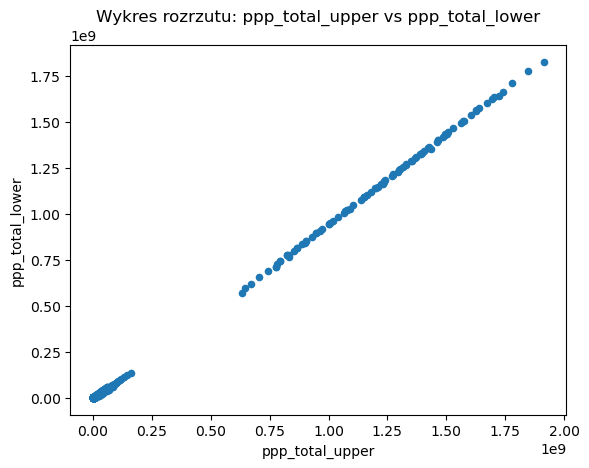


--- Zadanie 6: Przekształcanie danych ---

Dane z nową kolumną 'ppp_total_ppp_upper_new':
   location_id location_name iso3    level  year  the_total_mean  \
0          160   Afghanistan  AFG  Country  1995          528409   
1          160   Afghanistan  AFG  Country  1996          516915   
2          160   Afghanistan  AFG  Country  1997          509874   
3          160   Afghanistan  AFG  Country  1998          485561   
4          160   Afghanistan  AFG  Country  1999          463720   

   the_total_lower  the_total_upper  the_total_ppp_mean  the_total_ppp_lower  \
0           417121           665425             2193179              1731272   
1           412035           651034             2145473              1710165   
2           413424           636436             2116248              1715930   
3           394629           605041             2015335              1637919   
4           382723           564170             1924685              1588504   

   ...  ppp_per_gdp

In [15]:
# Główna funkcja wykonująca wszystkie zadania
def main():
    # Zadanie 1
    df = zadanie_1()
    
    # Zadanie 2
    zadanie_2(df)
    
    # Zadanie 3
    zadanie_3(df)
    
    # Zadanie 4
    zadanie_4(df)
    
    # Zadanie 5
    zadanie_5(df)
    
    # Zadanie 6
    zadanie_6(df)

if __name__ == "__main__":
    main()